In [1]:
import numpy as np
from scipy.integrate import odeint



s0=155.0;  i0=1.0;  s_inf=60.0;
sigma=(np.log(s0)-np.log(s_inf))/(s0+i0-s_inf)
print("sigma=",sigma)
S=np.array([155, 153, 139, 101])
I=(s0+i0)-S+1/sigma*np.log(S/s0)
print("所求的解为：\n",I)

sigma= 0.009886255778095274
所求的解为：
 [ 1.          1.6863383   5.97953014 11.67676321]


In [2]:
from sympy.abc import x
from sympy import diff, dsolve, simplify, Function



y=Function('y')
eq=diff(y(x),x,2)+2*diff(y(x),x)+2*y(x)  #定义方程
con={y(0): 0, diff(y(x),x).subs(x,0): 1}  #定义初值条件
y=dsolve(eq, ics=con)
print(simplify(y))

Eq(y(x), exp(-x)*sin(x))


In [3]:
from sympy.abc import x  #引进符号变量x
from sympy import Function, diff, dsolve, sin



y=Function('y')
eq=diff(y(x),x,2)+2*diff(y(x),x)+2*y(x)-sin(x)  #定义方程
con={y(0): 0, diff(y(x), x).subs(x,0): 1}  #定义初值条件
y=dsolve(eq, ics=con)
print(y)

Eq(y(x), (6*sin(x)/5 + 2*cos(x)/5)*exp(-x) + sin(x)/5 - 2*cos(x)/5)


In [4]:
import sympy as sp



t=sp.symbols('t')
x1,x2,x3=sp.symbols('x1,x2,x3',cls=sp.Function)
eq=[x1(t).diff(t)-2*x1(t)+3*x2(t)-3*x3(t),
    x2(t).diff(t)-4*x1(t)+5*x2(t)-3*x3(t),
    x3(t).diff(t)-4*x1(t)+4*x2(t)-2*x3(t)]
con={x1(0):1, x2(0):2, x3(0):3}
s=sp.dsolve(eq, ics=con); print(s)

[Eq(x1(t), 2*exp(2*t) - exp(-t)), Eq(x2(t), 2*exp(2*t) - exp(-t) + exp(-2*t)), Eq(x3(t), 2*exp(2*t) + exp(-2*t))]


In [5]:
import sympy as sp



t=sp.symbols('t')
x1,x2,x3=sp.symbols('x1:4',cls=sp.Function)
x=sp.Matrix([x1(t),x2(t),x3(t)])
A=sp.Matrix([[2,-3,3],[4,-5,3],[4,-4,2]])
eq=x.diff(t)-A*x
s=sp.dsolve(eq,ics={x1(0):1,x2(0):2,x3(0):3})
print(s)

[Eq(x1(t), 2*exp(2*t) - exp(-t)), Eq(x2(t), 2*exp(2*t) - exp(-t) + exp(-2*t)), Eq(x3(t), 2*exp(2*t) + exp(-2*t))]


In [8]:
from scipy.integrate import odeint
from numpy import arange



dy=lambda y, x: -2*y+x**2+2*x
x=arange(1, 10.5, 0.5)
sol=odeint(dy, 2, x)
print("x=\n{}\n对应的数值解y=\n{}".format(x, sol.T))

x=
[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10. ]
对应的数值解y=
[[ 2.          2.08484933  2.9191691   4.18723381  5.77289452  7.63342241
   9.75309843 12.12613985 14.75041934 17.62515427 20.75005673 24.12502089
  27.7500077  31.62500278 35.75000104 40.1250004  44.75000015 49.62500006
  54.75000002]]


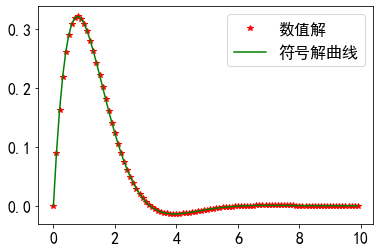

In [9]:
from scipy.integrate import odeint
from sympy.abc import t
import numpy as np
import matplotlib.pyplot as plt



def Pfun(y,x):
    y1, y2=y;
    return np.array([y2, -2*y1-2*y2])
x=np.arange(0, 10, 0.1)  #创建时间点
sol1=odeint(Pfun, [0.0, 1.0], x)  #求数值解
plt.rc('font',size=16); plt.rc('font',family='SimHei')
plt.plot(x, sol1[:,0],'r*',label="数值解")
plt.plot(x, np.exp(-x)*np.sin(x), 'g', label="符号解曲线")
plt.legend(); plt.savefig("./微分方程模型/figure8_5.png"); plt.show()

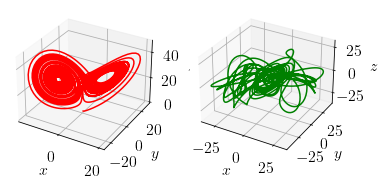

sol1= [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 9.51228522e-02  1.00353502e+00  4.79004160e-04]
 [ 1.82774668e-01  1.03241643e+00  1.86842924e-03]
 ...
 [-8.11714544e-02 -4.62253844e-01  1.63249369e+01]
 [-1.17747914e-01 -4.69467656e-01  1.58958170e+01]
 [-1.51756328e-01 -4.81345293e-01  1.54781637e+01]] 

 sol1-sol2= [[ 0.00000000e+00 -1.00000000e-04  0.00000000e+00]
 [-9.51228551e-06 -1.00353479e-04 -9.58055863e-08]
 [-1.82774502e-05 -1.03241296e-04 -3.73704777e-07]
 ...
 [ 4.73845276e+00  7.05830089e+00  1.22583772e-01]
 [ 4.98326548e+00  7.55968830e+00 -2.60695739e-01]
 [ 5.25374294e+00  8.08688747e+00 -6.83353812e-01]]


In [10]:
from scipy.integrate import odeint
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt




def lorenz(w,t):
    sigma=10; rho=28; beta=8/3
    x, y, z=w;
    return np.array([sigma*(y-x), rho*x-y-x*z, x*y-beta*z])



t=np.arange(0, 50, 0.01)  #创建时间点
sol1=odeint(lorenz, [0.0, 1.0, 0.0], t)  #第一个初值问题求解
sol2=odeint(lorenz, [0.0, 1.0001, 0.0], t)  #第二个初值问题求解
plt.rc('font',size=16); plt.rc('text',usetex=True)
ax1=plt.subplot(121,projection='3d')
ax1.plot(sol1[:,0], sol1[:,1], sol1[:,2],'r')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$y$'); ax1.set_zlabel('$z$')
ax2=plt.subplot(122,projection='3d')
ax2.plot(sol1[:,0]-sol2[:,0], sol1[:,1]-sol2[:,1], sol1[:,2]-sol2[:,2],'g')
ax2.set_xlabel('$x$'); ax2.set_ylabel('$y$'); ax2.set_zlabel('$z$')
plt.savefig("./微分方程模型/figure8_6.png", dpi=500); plt.show()
print("sol1=",sol1, '\n\n', "sol1-sol2=", sol1-sol2)

In [11]:
import sympy as sp



sp.var('t, k')  #定义符号变量t,k
u = sp.var('u', cls=sp.Function)  #定义符号函数
eq = sp.diff(u(t), t) + k * (u(t) - 24)  #定义方程
uu = sp.dsolve(eq, ics={u(0): 150}) #求微分方程的符号解
print(uu)
kk = sp.solve(uu, k)  #kk返回值是列表，可能有多个解
k0 = kk[0].subs({t: 10.0, u(t): 100.0})
print(kk, '\t', k0)
u1 = uu.args[1]  #提出符号表达式
u0 = u1.subs({t: 20, k: k0})  #代入具体值
print("20分钟后的温度为：", u0)


Eq(u(t), 24 + 126*exp(-k*t))
[log(126/(u(t) - 24))/t] 	 0.0505548566665147
20分钟后的温度为： 69.8412698412698


In [1]:
import sympy as sp



sp.var('h')  #定义符号变量
sp.var('t', cls=sp.Function)  #定义符号函数
g = 9.8
eq = t(h).diff(h) -10000*sp.pi/0.62/sp.sqrt(2*g)*(h**(3/2)-2*h**(1/2))  #定义方程
t = sp.dsolve(eq, ics={t(1): 0}) #求微分方程的符号解
t = sp.simplify(t)
print(t.args[1].n(9))

-15260.5042*h**1.5 + 4578.15127*h**2.5 + 10682.353


In [13]:
from numpy import array



v0=array([45, 65, 80])
T0=1; L=4.5; I=9; mu=0.7; g=9.8
T=v0/(2*mu*g)+(I+L)/v0+T0
print(T)


[4.57988338 5.94530164 6.99965379]


In [14]:
import numpy as np
from scipy.optimize import curve_fit



a=[]; b=[];
with open("./数据集/Pdata8_10_1.txt") as f:    #打开文件并绑定对象f
    s=f.read().splitlines()  #返回每一行的数据


for i in range(0, len(s),2):  #读入奇数行数据
    d1=s[i].split("\t")
    for j in range(len(d1)):
        if d1[j]!="":
            a.append(eval(d1[j]))  #把非空的字符串转换为年代数据


for i in range(1, len(s), 2):  #读入偶数行数据
    d2=s[i].split("\t")
    for j in range(len(d2)):
        if d2[j] != "":
            b.append(eval(d2[j])) #把非空的字符串转换为人口数据


c=np.vstack((a,b))  #构造两行的数组
np.savetxt("./数据集/Pdata8_10_2.txt", c)  #把数据保存起来供下面使用
x=lambda t, r, xm: xm/(1+(xm/3.9-1)*np.exp(-r*(t-1790)))
bd=((0, 200), (0.1,1000))  #约束两个参数的下界和上界
popt, pcov=curve_fit(x, a[1:], b[1:], bounds=bd)
print(popt); print("2010年的预测值为：", x(2010, *popt))

[2.73527906e-02 3.42441913e+02]
2010年的预测值为： 282.67978317394085


In [15]:
import numpy as np



d=np.loadtxt("./数据集/Pdata8_10_2.txt")  #加载文件中的数据
t0=d[0]; x0=d[1]  #提取年代数据及对应的人口数据
b=np.diff(x0)/10/x0[:-1]  #构造线性方程组的常数项列
a=np.vstack([np.ones(len(x0)-1),-x0[:-1]]).T #构造线性方程组系数矩阵
rs=np.linalg.pinv(a)@b;  r=rs[0]; xm=r/rs[1]
print("人口增长率r和人口最大值xm的拟合值分别为", np.round([r,xm],4))
xhat=xm/(1+(xm/3.9-1)*np.exp(-r*(2010-1790)))  #求预测值
print("2010年的预测值为：",round(xhat,4))

人口增长率r和人口最大值xm的拟合值分别为 [3.25000e-02 2.94386e+02]
2010年的预测值为： 277.9634


In [16]:
import sympy as sp



sp.var('t',positive=True); sp.var('s')  #定义符号变量
sp.var('Y',cls=sp.Function)  #定义符号函数
g=4*t*sp.exp(t)
Lg=sp.laplace_transform(g,t,s)  #方程右端项的拉氏变换
d=s**4*Y(s)+2*s**2*Y(s)+Y(s)
de=d-Lg[0]    #定义取拉氏变换后的代数方程
Ys=sp.solve(de,Y(s))[0]  #求像函数
Ys=sp.factor(Ys)
yt=sp.inverse_laplace_transform(Ys,s,t)
print("y(t)=",yt); yt=yt.rewrite(sp.exp)
#这里的变换只是为了把解化成指数函数，并且不出现虚数
yt=yt.as_real_imag(); print("y(t)=",yt)
yt=sp.simplify(yt[0]); print("y(t)=",yt)

y(t)= t*exp(t) + t*sin(t) - 2*exp(t) + sin(t) + 2*cos(t)
y(t)= (t*exp(t) + t*sin(t) - 2*exp(t) + sin(t) + 2*cos(t), 0)
y(t)= t*exp(t) + t*sin(t) - 2*exp(t) + sin(t) + 2*cos(t)


x(t)= 5*sin(t) - 4*sin(2*t) + sin(3*t)
y(t)= 10*sin(t) + 4*sin(2*t) - 6*sin(3*t)


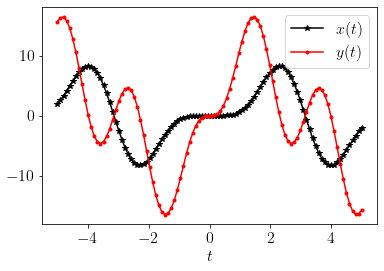

In [17]:
import sympy as sp
import pylab as plt
import numpy as np



sp.var('t',positive=True); sp.var('s')  #定义符号变量
sp.var('X,Y',cls=sp.Function)  #定义符号函数
g=40*sp.sin(3*t)
Lg=sp.laplace_transform(g,t,s)
eq1=2*s**2*X(s)+6*X(s)-2*Y(s)
eq2=s**2*Y(s)-2*X(s)+2*Y(s)-Lg[0]
eq=[eq1,eq2]    #定义取拉氏变换后的代数方程组
XYs=sp.solve(eq,(X(s),Y(s)))  #求像函数
Xs=XYs[X(s)]; Ys=XYs[Y(s)]
Xs=sp.factor(Xs); Ys=sp.factor(Ys)
xt=sp.inverse_laplace_transform(Xs,s,t)
yt=sp.inverse_laplace_transform(Ys,s,t)
print("x(t)=",xt); print("y(t)=",yt)
fx=sp.lambdify(t,xt,'numpy')  #转换为匿名函数
fy=sp.lambdify(t,yt,'numpy')
t=np.linspace(-5,5,100)
plt.rc('text',usetex=True)
plt.plot(t,fx(t),'*-k',label='$x(t)$')
plt.plot(t,fy(t),'.-r',label='$y(t)$')
plt.xlabel('$t$'); plt.legend(); plt.show()